# 딥러닝 프로젝트

## 1. Boston 주택 가격 예측 모델

In [1]:
# 라이브러리 불러오기
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [4]:
# train 데이터, 검증 데이터 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state = 123)

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Input(shape = (train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=16,
                    validation_data=(val_data, val_labels))

Epoch 1/60
19/19 [==============================] - 1s 10ms/step - loss: 558.0687 - mae: 21.7441 - val_loss: 515.3480 - val_mae: 21.1214
Epoch 2/60
19/19 [==============================] - 0s 3ms/step - loss: 477.9570 - mae: 19.9896 - val_loss: 415.6538 - val_mae: 18.8258
Epoch 3/60
19/19 [==============================] - 0s 3ms/step - loss: 356.6309 - mae: 16.9736 - val_loss: 271.4326 - val_mae: 14.8265
Epoch 4/60
19/19 [==============================] - 0s 3ms/step - loss: 206.4287 - mae: 12.0228 - val_loss: 123.2319 - val_mae: 8.8422
Epoch 5/60
19/19 [==============================] - 0s 3ms/step - loss: 96.2401 - mae: 7.4362 - val_loss: 59.7876 - val_mae: 5.9814
Epoch 6/60
19/19 [==============================] - 0s 3ms/step - loss: 57.6380 - mae: 5.6341 - val_loss: 40.8750 - val_mae: 4.9100
Epoch 7/60
19/19 [==============================] - 0s 3ms/step - loss: 41.4653 - mae: 4.8131 - val_loss: 29.3428 - val_mae: 4.1345
Epoch 8/60
19/19 [==============================] - 0s 3ms/s

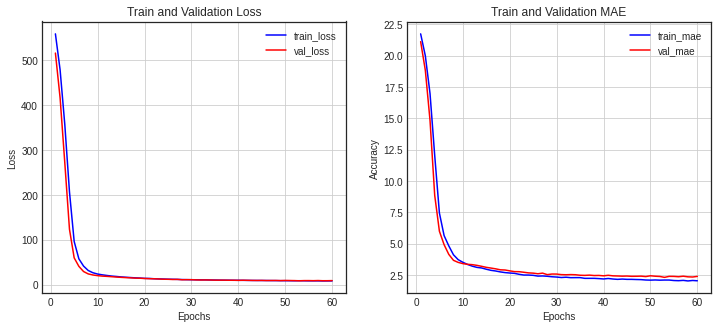

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

pred = model.predict(test_data)
print("실제 값: ", test_labels[10], " 예측 값: ", pred[10])

4/4 [==============================] - 0s 2ms/step - loss: 21.6021 - mae: 2.9958
실제 값:  18.6  예측 값:  [16.2187]


## 2. Reutuers 딥러닝 모델

In [9]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, initializers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state = 123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data),dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128,kernel_initializer=initializers.HeNormal(),input_shape=(10000, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,kernel_initializer=initializers.HeNormal()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 1s 46ms/step - loss: 2.8486 - accuracy: 0.3922 - val_loss: 3.2779 - val_accuracy: 0.6069
Epoch 2/40
14/14 [==============================] - 0s 16ms/step - loss: 1.5256 - accuracy: 0.6798 - val_loss: 2.8373 - val_accuracy: 0.6874
Epoch 3/40
14/14 [==============================] - 0s 14ms/step - loss: 1.0952 - accuracy: 0.7559 - val_loss: 2.5724 - val_accuracy: 0.7257
Epoch 4/40
14/14 [==============================] - 0s 15ms/step - loss: 0.8695 - accuracy: 0.8021 - val_loss: 2.3826 - val_accuracy: 0.7471
Epoch 5/40
14/14 [==============================] - 0s 16ms/step - loss: 0.7108 - accuracy: 0.8437 - val_loss: 2.2289 - val_accuracy: 0.7431
Epoch 6/40
14/14 [==============================] - 0s 16ms/step - loss: 0.5824 - accuracy: 0.8710 - val_loss: 2.0446 - val_accuracy: 0.7418
Epoch 7/40
14/14 [==============================] - 0s 16ms/step - loss: 0.4820 - accuracy: 0.8971 - val_loss: 1.8714 - val_accuracy: 0.7444
Epoch 8/40
14

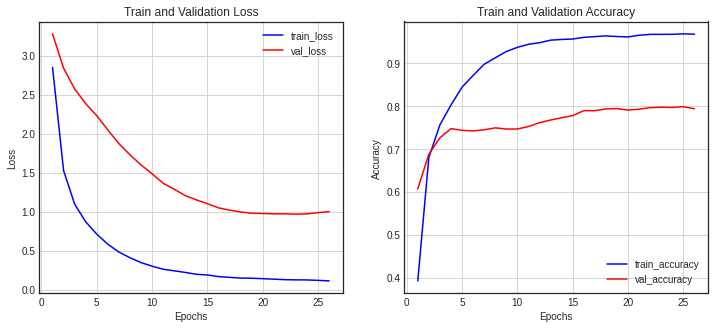

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("테스트 데이터에서 손실 (Test Loss):", test_loss)
print("테스트 데이터에서 정확도 (Test Accuracy):", test_accuracy)

71/71 [==============================] - 0s 3ms/step - loss: 0.9641 - accuracy: 0.7992
테스트 데이터에서 손실 (Test Loss): 0.9640942811965942
테스트 데이터에서 정확도 (Test Accuracy): 0.799198567867279


# CIFAR10 딥러닝 모델

In [16]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.25, random_state = 123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (37500, 32, 32, 3) 레이블: (37500, 1)
검증 데이터: (12500, 32, 32, 3) 레이블: (12500, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

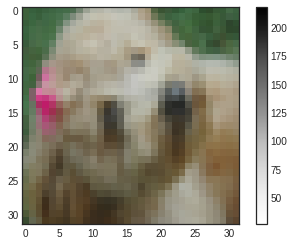

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 3072)
(12500, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()

model.add(layers.Dense(2048, input_shape=(x_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)             

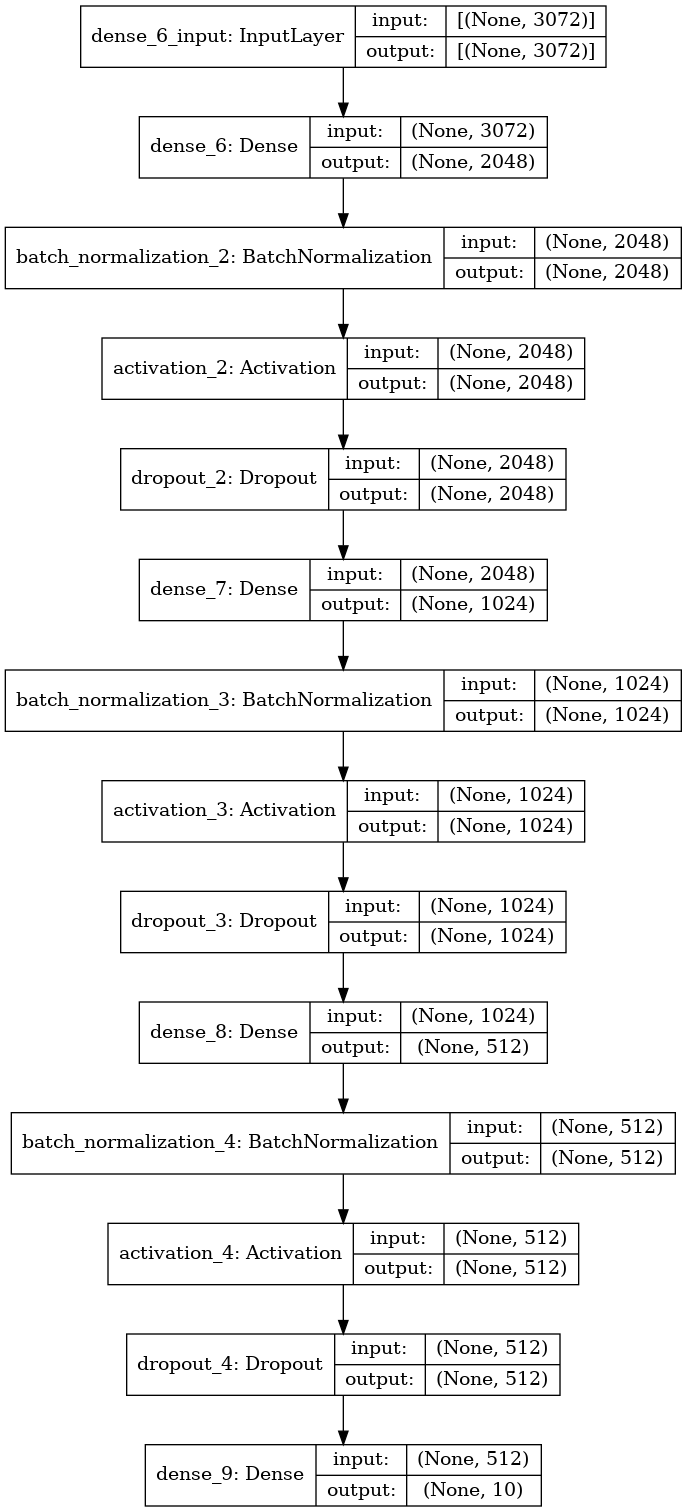

In [25]:
utils.plot_model(model, show_shapes=True)

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
74/74 [==============================] - 2s 20ms/step - loss: 1.9002 - accuracy: 0.3394 - val_loss: 2.2939 - val_accuracy: 0.2754
Epoch 2/60
74/74 [==============================] - 1s 12ms/step - loss: 1.6049 - accuracy: 0.4293 - val_loss: 2.0733 - val_accuracy: 0.2750
Epoch 3/60
74/74 [==============================] - 1s 12ms/step - loss: 1.4755 - accuracy: 0.4715 - val_loss: 1.7395 - val_accuracy: 0.3797
Epoch 4/60
74/74 [==============================] - 1s 12ms/step - loss: 1.3881 - accuracy: 0.5055 - val_loss: 1.8970 - val_accuracy: 0.3465
Epoch 5/60
74/74 [==============================] - 1s 12ms/step - loss: 1.3152 - accuracy: 0.5308 - val_loss: 1.7110 - val_accuracy: 0.4040
Epoch 6/60
74/74 [==============================] - 1s 12ms/step - loss: 1.2590 - accuracy: 0.5501 - val_loss: 1.7309 - val_accuracy: 0.3822
Epoch 7/60
74/74 [==============================] - 1s 12ms/step - loss: 1.1998 - accuracy: 0.5714 - val_loss: 1.7813 - val_accuracy: 0.3710
Epoch 8/60
74

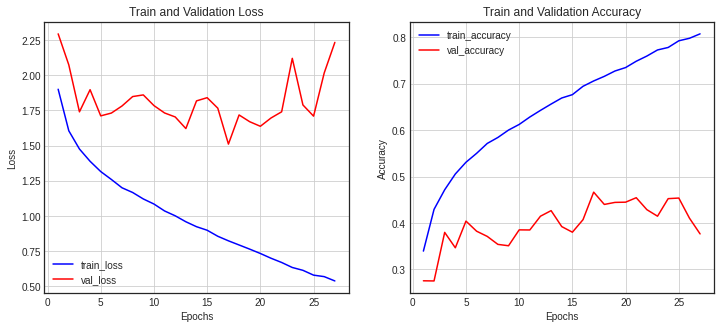

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5190 - accuracy: 0.4638


[1.5189721584320068, 0.46380001306533813]